# Data Science Course Project.

# Analysis Of Play Store Data

In [12]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
data = pd.read_csv("googleplaystore.csv")
data.dropna(inplace=True)#removes all the rows with atleast one null value,inplace is like conformation


# cleaning data

In [14]:
# Cleaning Reviews column
def filter(per):
    if "M" in str(per) and "," in str(per):
        per = str(per).replace("M","")
        per = per.replace(",","")
        return int(per)*1000000
    elif "M" in str(per):
        per = int(str(per).replace("M",""))
        return per*1000000
    elif "," in str(per):
        per = str(per).replace(",","")
        return int(per)
    
    else:  
        return int(per)

In [15]:
data["Reviews"] =data["Reviews"].apply(filter) # all the values of column 'Reviews' are passed to filter method

In [16]:
# Cleaning Size column

def filter1(per):
    per = str(per)
    if "M" in per:
        per = per.replace("M","")
        return float(per)
    elif per == "Varies with device":
        return np.NaN
    elif "k" in per:
        return float(per.replace("k",""))/1000
    else:
        return float(per)
    

In [17]:
data["Size"]=data["Size"].apply(filter1) #used to apply filter1 function 

In [18]:
# cleaning installs column

def filter2(per):
    per = str(per)
    if "+" in per:
        per = per.replace("+","")
    if "," in per:
        per = per.replace(",","")
        
    return int(per)

In [19]:
data["Installs"]=data["Installs"].apply(filter2)# used to apply filter2 function"

In [20]:
# cleaning price column
def filter3(per):
    per = str(per)
    if "$" in per:
        per=per.split("$")[1]
    return (float(per)*69.44)

In [21]:
data["Price"]=data["Price"].apply(filter3)# used to apply filter 3 function

# Data Visualizations

In [22]:
import plotly

%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

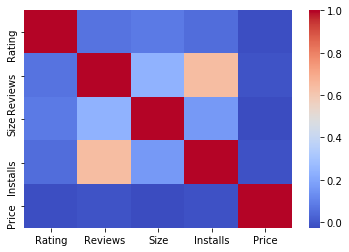

In [25]:
sns.heatmap(data.corr(),cmap='coolwarm')

In [30]:
number_of_apps_in_category = data['Category'].value_counts().sort_values(ascending=True)

df = [go.Pie(labels = number_of_apps_in_category.index,values =number_of_apps_in_category.values,hoverinfo = 'label+value')]

plotly.offline.iplot(df, filename='active_category')

In [31]:
df = [go.Histogram( x = data.Rating, xbins = {'start': 1, 'size': 0.1, 'end' :5} )]
print('Average app rating = ', np.mean(data['Rating']))
plotly.offline.iplot(df, filename='overall_rating_distribution')

Average app rating =  4.191837606837612


In [15]:
#print('Junk apps priced above 350$')
data[['Category', 'App',"Price"]][data.Price > 200*64]

,Category,App,Price
4197,FAMILY,most expensive app (H),27775.3056
4362,LIFESTYLE,💎 I'm rich,27775.3056
4367,LIFESTYLE,I'm Rich - Trump Edition,27776.0000
5351,LIFESTYLE,I am rich,27775.3056
5354,FAMILY,I am Rich Plus,27775.3056
5355,LIFESTYLE,I am rich VIP,20831.3056
5356,FINANCE,I Am Rich Premium,27775.3056
5357,LIFESTYLE,I am extremely Rich,26386.5056
5358,FINANCE,I am Rich!,27775.3056
5359,FINANCE,I am rich(premium),27775.3056


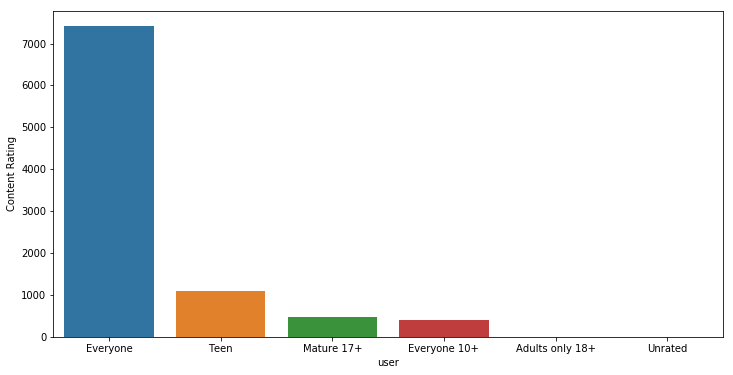

In [32]:
temp=pd.DataFrame(data["Content Rating"].value_counts()).reset_index()
temp.columns=['user', 'Content Rating']

plt.figure(figsize=(12,6))
sns.barplot(data=temp,x="user",y="Content Rating")

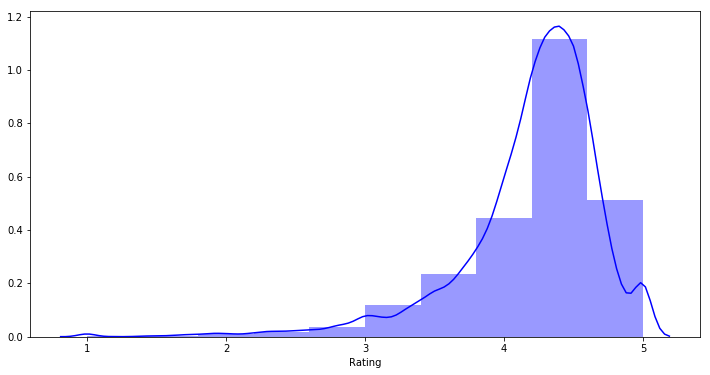

In [34]:
#most reviewed app rating
plt.figure(figsize=(12,6))
sns.distplot(data["Rating"],bins=10,color="blue")

C:\Users\Sairaj Nanaware\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

C:\Users\Sairaj Nanaware\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less



Text(0.5,0,'')

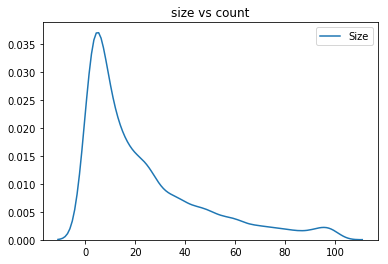

In [35]:
sns.kdeplot(data=data["Size"])
plt.title("size vs count")
plt.xlabel("")

Text(0.5,1,'avg rating table based on category')

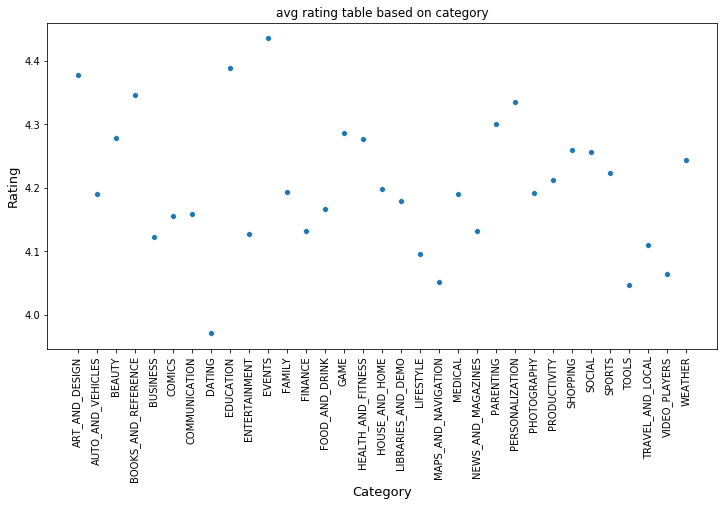

In [20]:
plt.figure(figsize=(12,6))

sns.scatterplot(x = data.groupby('Category')['Rating'].mean().index, y = data.groupby('Category')['Rating'].mean().values)
plt.xlabel('Category', fontsize=13)
plt.ylabel('Rating', fontsize=13)
plt.xticks(rotation=90)
plt.title("avg rating table based on category")

C:\Users\Sairaj Nanaware\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

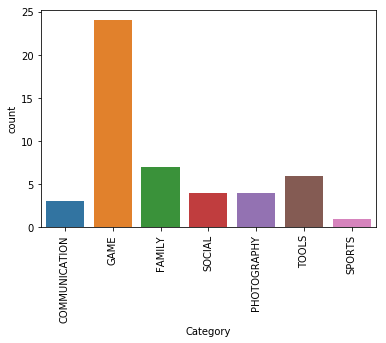

In [21]:
most_popular_apps = data[(data["Reviews"]>10000000) ][ (data["Rating"]>=4.5)]
sns.countplot(most_popular_apps["Category"])
plt.xticks(rotation=90)

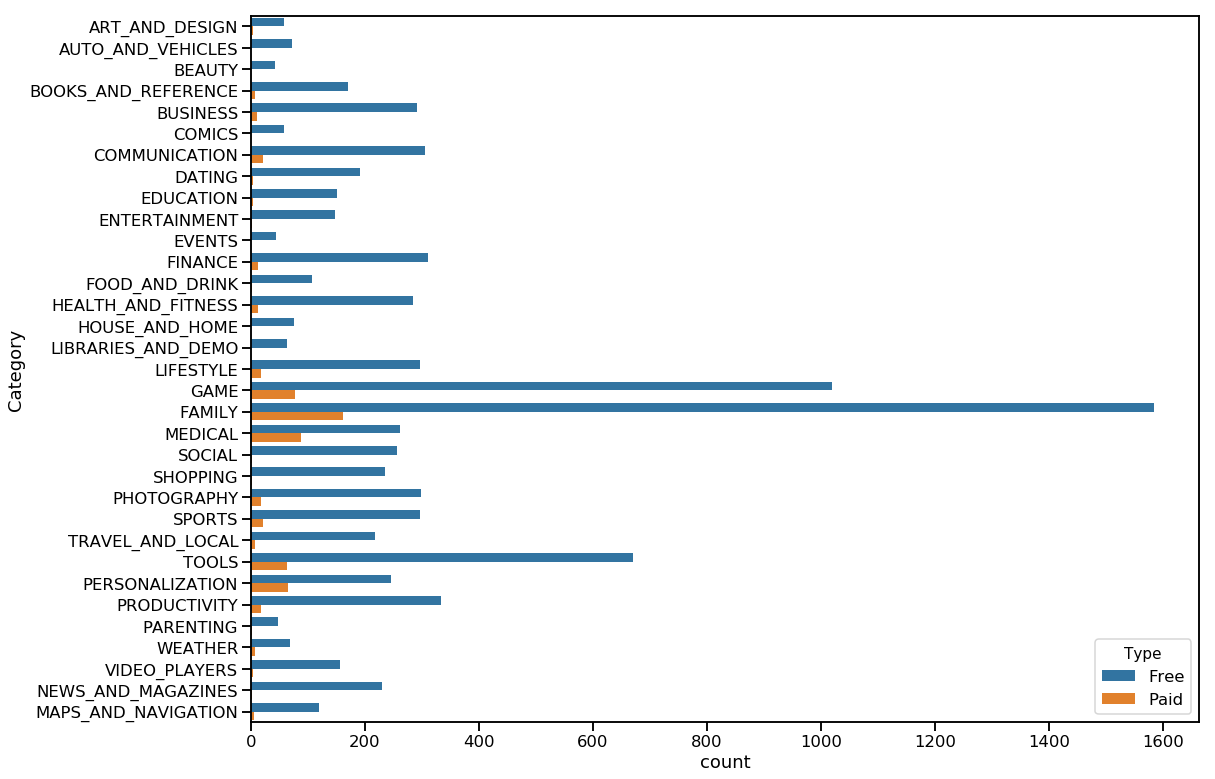

In [22]:
sns.set_context('talk',font_scale=1)
plt.figure(figsize=(17,13))
sns.countplot(data=data,y="Category",hue="Type")

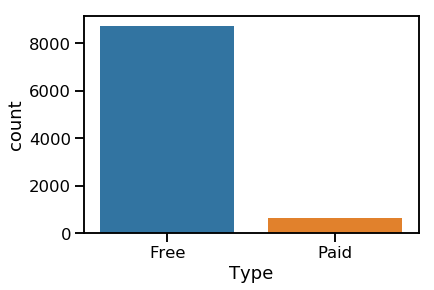

In [23]:
sns.countplot(x=data["Type"])

# Most popular apps analysis

Text(0.5,0,'no of apps')

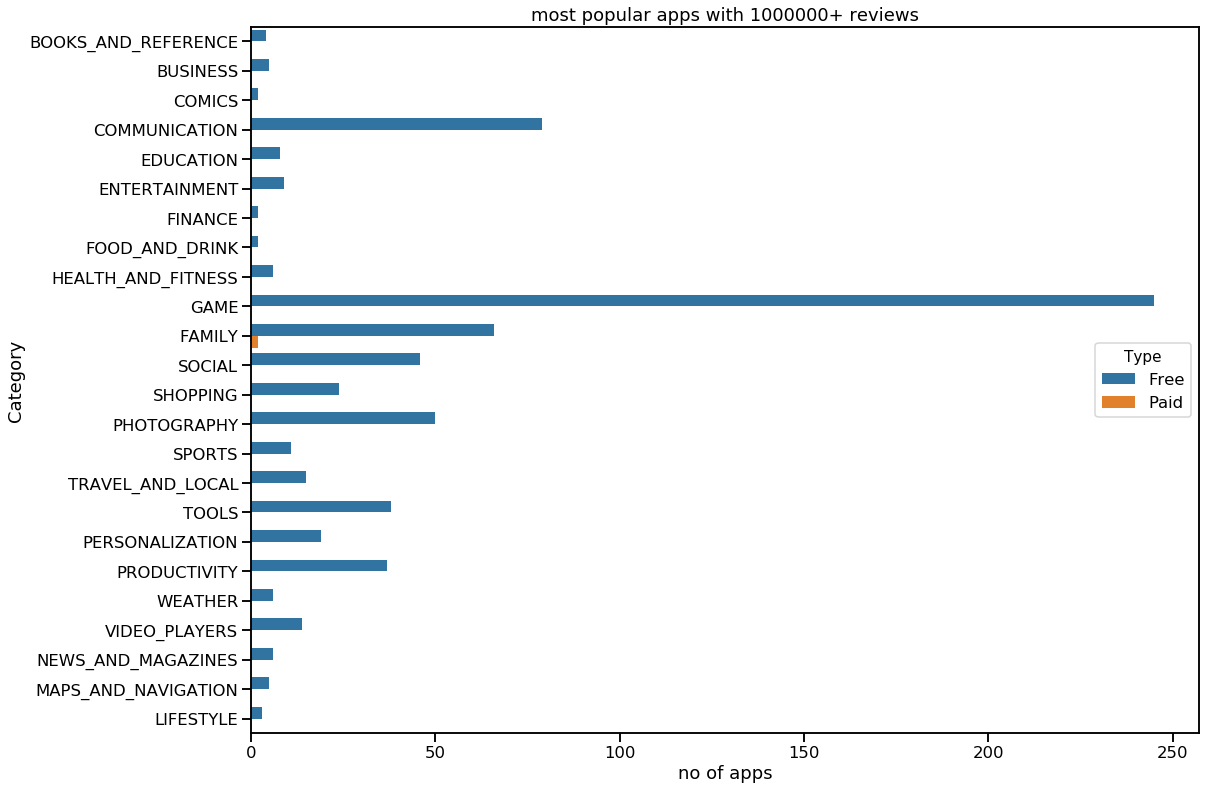

In [24]:
plt.figure(figsize=(17,13))
sns.countplot(data=data[data["Reviews"]>1000000],y="Category",hue="Type")
plt.title("most popular apps with 1000000+ reviews")
plt.xlabel("no of apps")

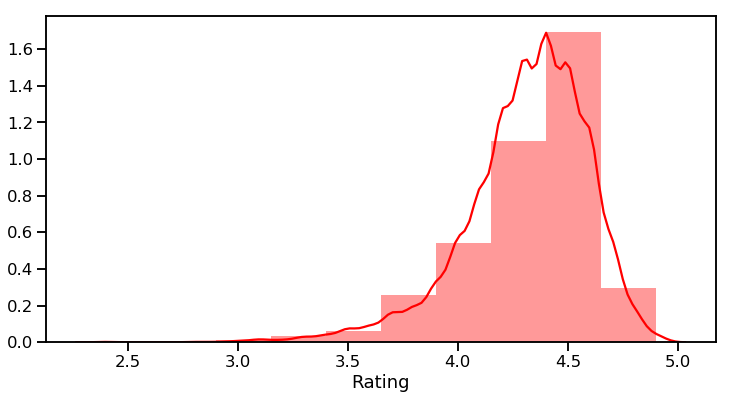

In [25]:
#most reviewed app rating
plt.figure(figsize=(12,6))
sns.distplot(data[data["Reviews"]>10000]["Rating"],bins=10,color="red")

C:\Users\Sairaj Nanaware\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

C:\Users\Sairaj Nanaware\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less

C:\Users\Sairaj Nanaware\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Sairaj Nanaware\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



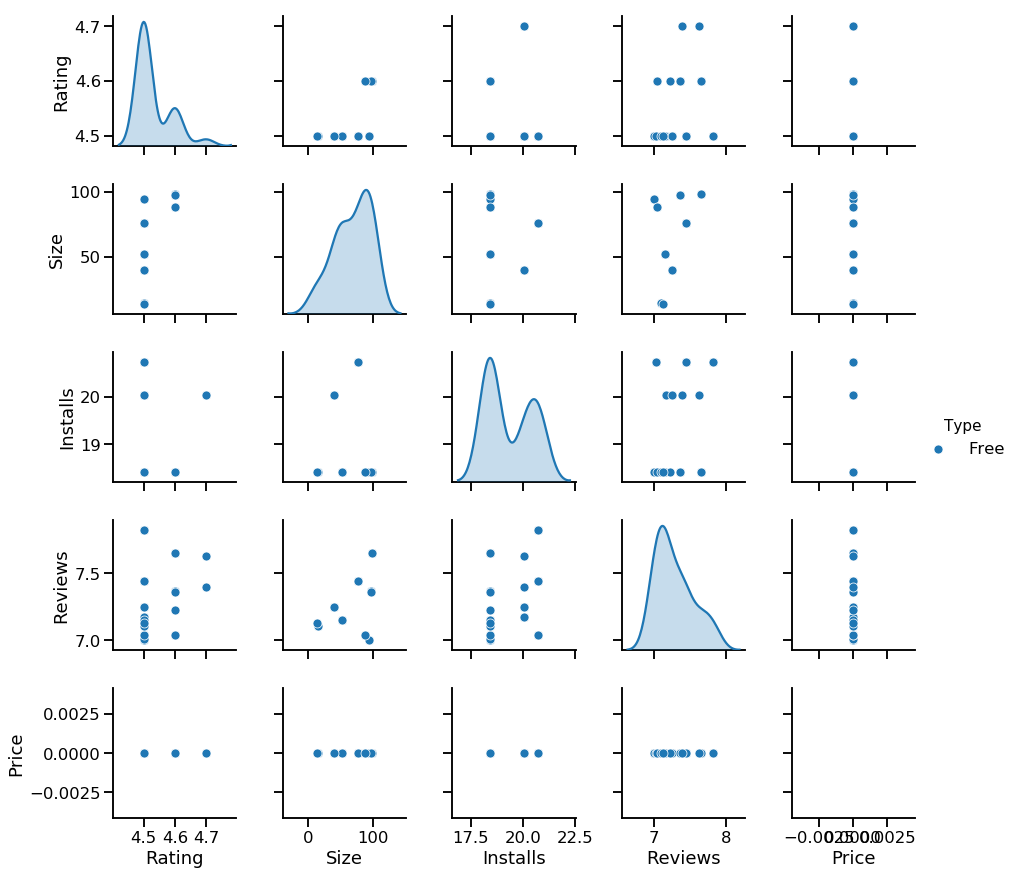

In [26]:
sns.pairplot(pd.DataFrame(list(zip(most_popular_apps["Rating"],most_popular_apps["Size"], np.log(most_popular_apps["Installs"]), np.log10(most_popular_apps["Reviews"]),most_popular_apps["Type"], most_popular_apps["Price"])), 
columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type')

Text(0.5,1,'apps with reviews graterthan 100000')

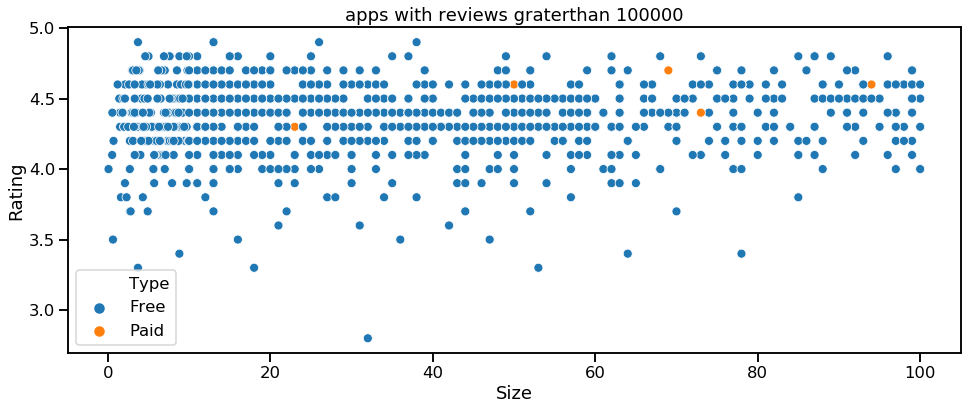

In [27]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=data[data["Reviews"]>100000],x="Size",y="Rating",hue="Type")
plt.title("apps with reviews graterthan 100000")

In [36]:
x=np.log(data["Installs"])
y=np.log(data["Reviews"])
popular_apps = data[(data["Installs"]>10000000) & (data["Rating"]>=4.7)]
#the most popular paid apps with decent reviews and ratings
pd.DataFrame(popular_apps[popular_apps["Type"]=="Free"][["App"]])

,App
699,Duolingo: Learn Languages Free
784,Duolingo: Learn Languages Free
799,Duolingo: Learn Languages Free
826,Duolingo: Learn Languages Free
1360,Period Tracker - Period Calendar Ovulation Tra...
1677,Bubble Witch 3 Saga
1712,Toy Blast
1720,Bowmasters
1762,Bowmasters
1763,Piano Tiles 2™


In [39]:
popular_apps = data[(data["Installs"]>100000) & (data["Rating"]>4.5)]
#the most popular paid apps with decent reviews and ratings
pd.DataFrame(popular_apps[popular_apps["Type"]=="Paid"][["App","Price"]])

,App,Price
853,Toca Life: City,277.0656
2151,Toca Life: City,277.0656
4034,Hitman Sniper,68.7456
4260,Cut the Rope GOLD,68.7456
5627,Five Nights at Freddy's 2,207.6256
5631,Five Nights at Freddy's,207.6256
6936,Hitman GO,68.7456
8449,Cameringo+ Filters Camera,207.6256
8804,DraStic DS Emulator,346.5056
8860,Bloons TD 5,207.6256


# MACHINE LEARNING TO PRIDICT RATING

# Random Forest Regression

In [40]:
mldata = data[["Reviews","Size","Installs","Price","Rating"]]
mldata.dropna(inplace=True)

X=mldata.iloc[:,0:-1].values
y = mldata.iloc[:,-1].values

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300)

C:\Users\Sairaj Nanaware\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [41]:
rfr.fit(xtrain,ytrain)
ypre = rfr.predict(xtest)

df=pd.DataFrame()

df["ytest"]=pd.Series(ytest)

df["ypre"] =pd.Series(ypre)
df.sample(10)

,ytest,ypre
1424,4.0,4.159333
818,4.5,4.365333
467,4.1,3.471333
1498,4.2,4.212667
1239,3.3,4.340333
840,4.9,4.415000
1300,4.3,4.164000
170,4.1,4.424667
42,5.0,3.937333
318,4.7,4.320333
